In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [13]:
df = pd.read_csv('../pollutants.csv')
df = df.drop(df.columns[[0]], axis=1)
df.head(5)

,length,POP_PCB1,POP_PCB2,POP_PCB3,POP_PCB4,POP_PCB5,POP_PCB6,POP_PCB7,POP_PCB8,POP_PCB9,...,basophils_pct,neutrophils_pct,BMI,edu_cat,race_cat,male,ageyrs,yrssmoke,smokenow,ln_lbxcot
0,1.158765,20000,7600,3700,14700.0,18900.0,5300,5500,5700,2000,...,6.2,0.6,27.50,2,4,1,41,0,0,-2.312635
1,0.901128,43900,14900,9700,32300.0,55500.0,13400,18700,12000,16200,...,3.2,0.5,27.46,3,4,0,77,0,0,-4.509860
2,1.275395,3300,3300,3300,3300.0,3300.0,3300,3300,3300,3300,...,1.6,0.9,36.13,1,2,0,22,0,0,-4.017384
3,0.936906,8500,4100,6000,11500.0,13500.0,6900,13500,4100,4100,...,1.7,0.2,21.79,4,4,0,27,0,0,-3.863233
4,0.702800,159000,60200,29800,170000.0,215000.0,79200,47400,41400,53900,...,3.0,0.8,31.46,2,4,1,78,0,0,-1.826351


In [24]:
target_col = df.columns[[0]]
target = df[target_col]
target.head(5)

,length
0,1.158765
1,0.901128
2,1.275395
3,0.936906
4,0.702800


In [25]:
predictor_cols = df.columns[list(range(1,df.shape[1]))]
predictors = df[predictor_cols]
predictors.head(5)

,POP_PCB1,POP_PCB2,POP_PCB3,POP_PCB4,POP_PCB5,POP_PCB6,POP_PCB7,POP_PCB8,POP_PCB9,POP_PCB10,...,basophils_pct,neutrophils_pct,BMI,edu_cat,race_cat,male,ageyrs,yrssmoke,smokenow,ln_lbxcot
0,20000,7600,3700,14700.0,18900.0,5300,5500,5700,2000,15.6,...,6.2,0.6,27.50,2,4,1,41,0,0,-2.312635
1,43900,14900,9700,32300.0,55500.0,13400,18700,12000,16200,35.4,...,3.2,0.5,27.46,3,4,0,77,0,0,-4.509860
2,3300,3300,3300,3300.0,3300.0,3300,3300,3300,3300,1.8,...,1.6,0.9,36.13,1,2,0,22,0,0,-4.017384
3,8500,4100,6000,11500.0,13500.0,6900,13500,4100,4100,4.5,...,1.7,0.2,21.79,4,4,0,27,0,0,-3.863233
4,159000,60200,29800,170000.0,215000.0,79200,47400,41400,53900,59.2,...,3.0,0.8,31.46,2,4,1,78,0,0,-1.826351


## Exploring Age

In [30]:
age_data = df[['ageyrs']]
age_data.head(5)

,ageyrs
0,41
1,77
2,22
3,27
4,78


Text(0.5, 1.0, 'age-vs-length')

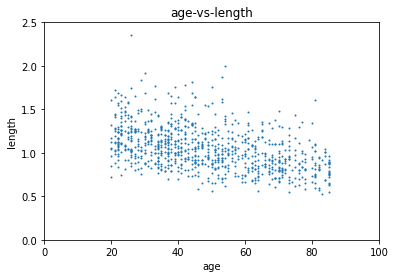

In [44]:
plt.scatter(age_data, target, s=1)
plt.xlim((0, 100))
plt.ylim((0, 2.5))
plt.xlabel("age")
plt.ylabel("length")
plt.title("age-vs-length")

In [42]:
reg = LinearRegression().fit(age_data, target)
intercept = reg.intercept_[0]
slope = reg.coef_[0][0]
print("Score:", reg.score(age_data, target))
print("Slope:", slope)
print("Intercept:", intercept)

Score: 0.19840273834987499
Slope: -0.006099532568924627
Intercept: 1.3492575355989027


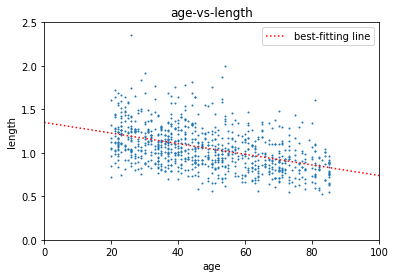

In [51]:
plt.scatter(age_data, target, s=1)
plt.xlim((0, 100))
plt.ylim((0, 2.5))
plt.xlabel("age")
plt.ylabel("length")
plt.title("age-vs-length")

x = np.linspace(0, 100, 100)
plt.plot(x, slope * x + intercept, ':r', label='best-fitting line')
plt.legend()

## Exploring Sex

In [52]:
sex_data = df[['male']]
sex_data.head(5)

,male
0,1
1,0
2,0
3,0
4,1


Text(0.5, 1.0, 'age-vs-length')

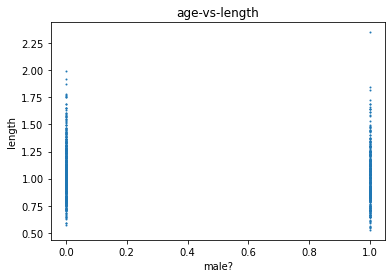

In [55]:
plt.scatter(sex_data, target, s=1)
plt.xlabel("male?")
plt.ylabel("length")
plt.title("sex-vs-length")

In [82]:
target_to_list = [x[0] for x in target.values.tolist()]
sex_data_to_list = [x[0] for x in sex_data.values.tolist()]

male_data = np.array([x for (x, y) in zip(target_to_list, sex_data_to_list) if y == 1])
female_data = np.array([x for (x, y) in zip(target_to_list, sex_data_to_list) if y == 0])

male_mean = np.mean(male_data)
female_mean = np.mean(female_mean)

male_median = np.median(np.array(male_data))
female_median = np.median(np.array(female_data))

print(f"male mean = {male_mean}, female mean = {female_mean}")
print(f"male median = {male_median}, female median = {female_median}")

male mean = 1.0233887284178182, female mean = 0.6113180036250995
male median = 1.00156272913, female median = 1.042824070785


Text(0, 0.5, 'Frequency')

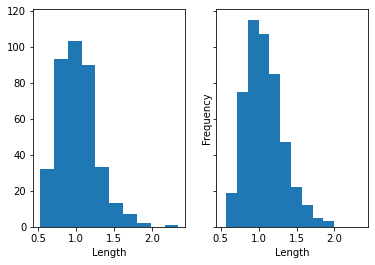

In [112]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
axes[0].hist(male_data, bins=10)
axes[1].hist(female_data, bins=10)
axes[0].set_xlabel('Length')
axes[1].set_xlabel('Length')
axes[0].set_ylabel('Length')
axes[1].set_ylabel('Length')
plt.xlabel("Length")
plt.ylabel("Frequency")